In [1]:
import simcmb
import itertools
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
Yo0 = simcmb.Yobj()
PM0 = simcmb.PS_Maker(Yo0)

In [3]:
PM0.get_cls(save_to_dict='a')

from 12:04:48.847960 P to 12:04:50.296746 P or 1.448786 seconds total


In [4]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000}}

In [5]:
Yo0.update_val('InitPower.r', 0.04)

In [6]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000}}

In [7]:
PM0.get_cls(save_to_dict='b')

from 12:04:58.692295 P to 12:05:00.064238 P or 1.371943 seconds total


In [8]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000},
 'b': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'InitPower': {'r': 0.04},
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'extra_l': 300,
  'max_l_use': 10000}}

In [9]:
PM0.loop_sims(user_params=True)

from 12:05:12.003564 P to 12:05:13.378094 P or 1.374530 seconds total
from 12:05:13.379744 P to 12:05:14.837750 P or 1.458006 seconds total
from 12:05:14.839450 P to 12:05:16.199624 P or 1.360174 seconds total
from 12:05:16.201211 P to 12:05:17.590779 P or 1.389568 seconds total
from 12:05:17.592404 P to 12:05:18.998343 P or 1.405939 seconds total
from 12:05:19.000096 P to 12:05:20.353949 P or 1.353853 seconds total
from 12:05:20.355617 P to 12:05:21.700916 P or 1.345299 seconds total
from 12:05:21.702599 P to 12:05:23.058501 P or 1.355902 seconds total
from 12:05:23.060085 P to 12:05:24.496078 P or 1.435993 seconds total


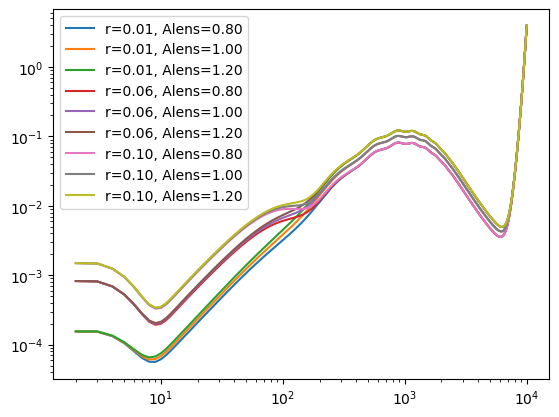

In [10]:
for r in PM0.runids:
    d, p = PM0.results[r], PM0.result_parameters[r]
    try:
        label_r = p['FORCAMB']['InitPower']['r']
    except KeyError:
        label_r = Yo0._all_params_dict['BASECAMBPARAMS']['InitPower']['r']
    try:
        label_A = p['FORCAMB']['Alens']
    except KeyError:
        label_A = Yo0._all_params_dict['BASECAMBPARAMS']['Alens']
    plt.plot(d['l'][2:], d['clBB'][2:],
             label=f"r={label_r:.2f}, Alens={label_A:.2f}")
plt.loglog()
plt.legend()
plt.show()

In [11]:
PM0.savecls(savedir="/Users/sammcd/simcmb/simcmb/outfiles/", permission='w')

In [13]:
f1 = simcmb.clplotting.flatmap(192, 5, cl_dict=PM0.results['runid_230511120513379726_970660'])

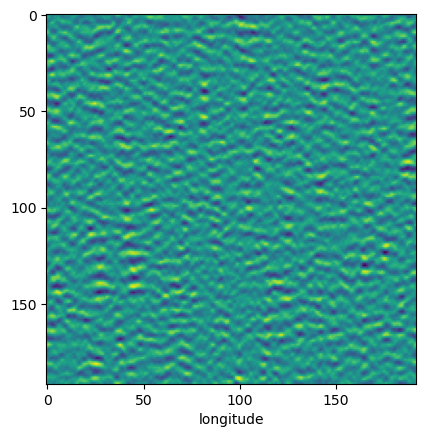

In [14]:
plt.imshow(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [15]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(-2.0954757928848267e-09, -2192.2957996092737)

In [16]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [17]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [18]:
f2 = simcmb.clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [19]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[-3289.6944982 , -2610.02016934, -1257.91025436, ...,
           1403.51424083,  -427.11843213, -2326.13320947],
         [ -188.05660694,  -294.91548912, -1401.17035376, ...,
            500.99987948,   295.92655919, -1157.11107497],
         [ 2095.58417747,  1135.78788961, -1667.27487659, ...,
           -269.59774689,   -65.58774904,  1269.34054583],
         ...,
         [-4492.25012004, -4012.82171222, -3925.70896407, ...,
            -32.87436346,  -811.69090158, -2953.67737337],
         [-4321.86951166, -4307.37245731, -2655.39786482, ...,
           1029.09877157,  -513.82271302, -2631.03897124],
         [-4330.31272064, -3552.61458586, -2365.99040209, ...,
            952.62674227,  -518.54763778, -3165.86591797]]]),
 array([[[ -579.83983142,  1037.10193362,  2509.60880528, ...,
          -3579.16995532, -2124.83876793,  -311.08020339],
         [ 1437.62327481,  1911.12024768,  2928.09224075, ...,
          -1430.77145239,   627.66476132,  1625.56337654],
       

In [20]:
f1.flatmap('J')

not a valid map specification


In [22]:
new_YD = simcmb.Yobj(user_config="/Users/sammcd/simcmb/simcmb/outfiles/runid_230511120513379726_970660_params.yaml")
new_PM = simcmb.PS_Maker(new_YD)

In [23]:
import h5py

In [24]:
old_cls = {}
with h5py.File("/Users/sammcd/simcmb/simcmb/outfiles/runid_230511120513379726_970660_results.h5", 'r') as f:
    for k in f:
        old_cls[k] = np.array(f[k])

In [25]:
new_cls = new_PM.get_cls()

from 12:06:28.268683 P to 12:06:29.693840 P or 1.425157 seconds total


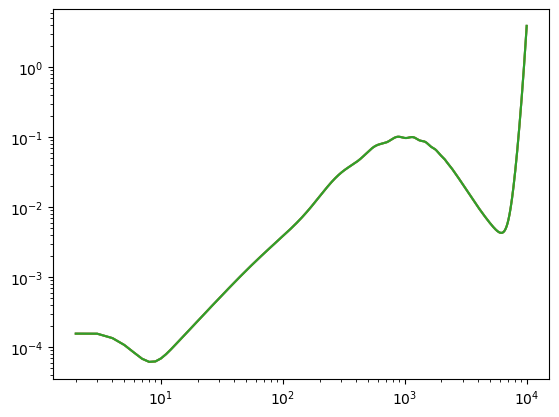

In [26]:
plt.plot(new_cls['l'][2:], new_cls['clBB'][2:])
plt.plot(new_cls['l'][2:], PM0.results['runid_230511120513379726_970660']['clBB'][2:])
plt.plot(old_cls['l'][2:], old_cls['clBB'][2:])
plt.loglog()
plt.show()

In [28]:
Yd0.update_val?

for 10000 multipoles, one h5 file is roughly 0.5-1MB